# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 01/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 2 [here](https://www.nltk.org/book/ch02.html).

# CONTENT

1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
    1. Accessing Text Corpora
    2. Conditional Frequency Distributions
    3. More Python: Reusing Code
    4. [Lexical Resources](#LexicalResources)
        1. [Wordlist Corpora](#Wordlist)
        2. [A Pronouncing Dictionary](#PronDict)
        3. [Comparative Wordlists](#CompWord)
        4. [Shoebox and Toolbox Lexicons](#ShoeTool)

**Install**, **import** and **download NLTK**. <br>

*Uncomment lines 2 and 5 if you haven't installed and downloaded NLTK yet.*

In [14]:
# install nltk
#!pip install nltk

# load nltk
import nltk

# download nltk
#nltk.download()

<a name="LexicalResources"></a>
## 2.4. Lexical Resources
1. [Wordlist Corpora](#Wordlist)
2. [A Pronouncing Dictionary](#PronDict)
3. [Comparative Wordlists](#CompWord)
4. [Shoebox and Toolbox Lexicons](#ShoeTool)

A **lexicon**, or **lexical resource**, is a collection of **words** and/or phrases along **with associated information** such as part of speech and sense definitions. 

Lexical resources are **secondary to texts**, and are usually created and enriched with the help of texts. 

For example, if we have defined a text `my_text`, then `vocab = sorted(set(my_text))` builds the vocabulary of my_text, while `word_freq = FreqDist(my_text)` counts the frequency of each word in the text. 

Both of `vocab` and `word_freq` are **simple lexical resources**. 

Similarly, a **concordance** gives us information about word usage that might help in the preparation of a dictionary. 

**Standard terminology**: 
1. A **lexical entry** consists of a headword (also known as a **lemma**) along with additional information such as the part of speech and the sense definition. 
2. Two distinct words having the same spelling are called **homonyms**.

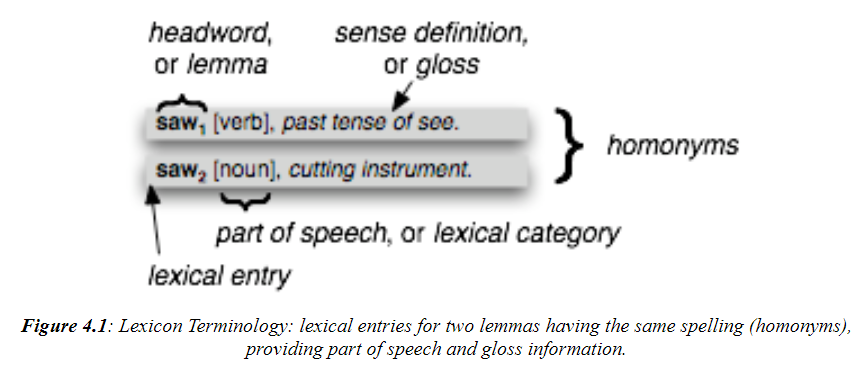

<a name="Wordlist"></a>
### 2.4.1 Wordlist Corpora
`from nltk.corpus import words` <br>
`from nltk.corpus import stopwords` <br>
`from nltk.corpus import names`

NLTK includes some corpora that are nothing more than **wordlists**.

The **Words Corpus** is the */usr/share/dict/words* file from Unix, used by some spell checkers. 

We can use it to find unusual or mis-spelt words in a text corpus.

In [15]:
from nltk.corpus import nps_chat, words

def unusual_words(text):
    """Find words that do not exist in the English vocabulary."""
    # create the vocab of text
    text_vocab = set(w.lower() for w in text if w.isalpha())
    # assign the english vocab in a var
    english_vocab = set(w.lower() for w in words.words())
    # keep only the words that don't exist in the eng vocab
    unusual = text_vocab - english_vocab
    # return the words in alphabetical order
    return sorted(unusual)

# print the first 10 unusual words
print(unusual_words(nltk.corpus.nps_chat.words())[:10])

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams']


There is also a corpus of **stopwords**, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. 

Stopwords usually have **little lexical content**, and their presence in a text fails to distinguish it from other texts.

In [16]:
from nltk.corpus import stopwords, reuters

def content_fraction(text):
    "Calculate what fraction of the text account for the stopwords."
    
    # assign stopwords to a var
    stopwords = nltk.corpus.stopwords.words('english')
    # keep the word only if it is not a stopword
    content = [w for w in text if w.lower() not in stopwords]
    # calculate the fraction that the stopwords account for
    return (1-(len(content) / len(text))) * 100

# invoke the function
print("The percentage of stopwords in this text is: {:.2f}%.".format(
    content_fraction(nltk.corpus.reuters.words())))

The percentage of stopwords in this text is: 26.48%.


A wordlist is useful for **solving word puzzles**.

We can make a program which iterates through every word and, for each one, checks whether it meets the conditions. 

It is easy to check obligatory letter and length constraints (and we'll only look for words with six or more letters here). 

It is trickier to check that candidate solutions only use combinations of the supplied letters, especially since some of the supplied letters appear twice (here, the letter v).

The **FreqDist comparison method** permits us to check that the frequency of each letter in the candidate word is less than or equal to the frequency of the corresponding letter in the puzzle.

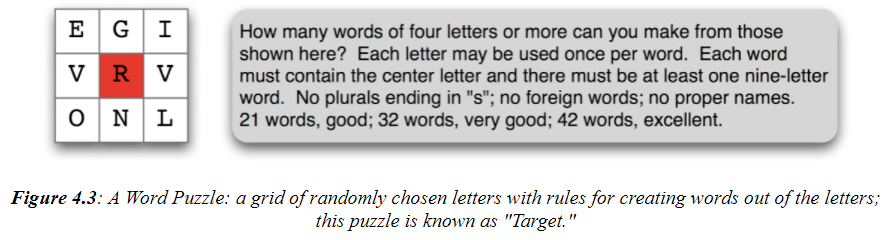

In [23]:
# create pool of letters
puzzle_letters = nltk.FreqDist('egivrvonl')

# select obligatory letters
obligatory = 'r'

# assign the corpora to a var
wordlist = nltk.corpus.words.words()

# check for length constraints
print([w for w in wordlist if len(w) >= 6
 # check for obligatory letter
 and obligatory in w
 # check that Freq of each letter <= of puzzle letter
 and nltk.FreqDist(w) <= puzzle_letters])

['glover', 'gorlin', 'govern', 'grovel', 'ignore', 'involver', 'lienor', 'linger', 'longer', 'lovering', 'noiler', 'overling', 'region', 'renvoi', 'revolving', 'ringle', 'roving', 'violer', 'virole']


One more wordlist corpus is the **Names corpus**, containing **8,000 first names categorized by gender**. The male and female names are stored in separate files. 

We can find names which appear in both files, i.e. names that are **ambiguous for gender**.

In [33]:
from nltk.corpus import names

# print the files included in corpus
print(names.fileids())

# assign male names to a var
male_names = names.words('male.txt')
# assign female names to a var
female_names = names.words('female.txt')
print(" ")
# print the first 10 names that are in both variables
print([w for w in male_names if w in female_names][:20])

['female.txt', 'male.txt']
 
['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel']


It is well known that names ending in the letter a are almost always female. We can see this and some other **patterns** visually. 

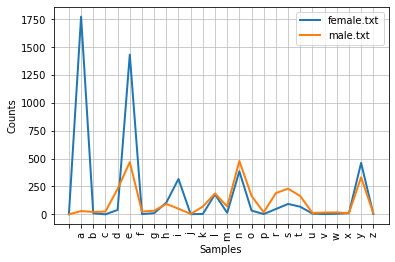

In [34]:
# create a CFD
cfd = nltk.ConditionalFreqDist(
    # create a list of pairs (file name, last letter of the name)
    (fileid, name[-1])
    # for each file in the names corpus
    for fileid in names.fileids()
    # for each name in this file
    for name in names.words(fileid)
)

# generate the plot
cfd.plot();

The above plot shows the number of female and male names ending with each letter of the alphabet; most names ending with **a, e or i are female**; names ending in **h and l are equally likely to be male or female**; names ending in **k, o, r, s, and t are likely to be male**.

<a name="PronDict"></a>
### 2.4.2 A Pronouncing Dictionary
`from nltk.corpus import cmudict`

A richer kind of lexical resource is a table containing **a word plus some properties** in each row.

The **CMU Pronouncing Dictionary** for **US English** was designed for use by **speech synthesizers**.

In [11]:
from nltk.corpus import cmudict

# for each element in cmudict
for entry in cmudict.entries()[:10]:
    # print the element with a space at the end
    print(entry, end= " ")

('a', ['AH0']) ('a.', ['EY1']) ('a', ['EY1']) ('a42128', ['EY1', 'F', 'AO1', 'R', 'T', 'UW1', 'W', 'AH1', 'N', 'T', 'UW1', 'EY1', 'T']) ('aaa', ['T', 'R', 'IH2', 'P', 'AH0', 'L', 'EY1']) ('aaberg', ['AA1', 'B', 'ER0', 'G']) ('aachen', ['AA1', 'K', 'AH0', 'N']) ('aachener', ['AA1', 'K', 'AH0', 'N', 'ER0']) ('aaker', ['AA1', 'K', 'ER0']) ('aalseth', ['AA1', 'L', 'S', 'EH0', 'TH']) 

For each word provides a **list of phonetic codes** - distinct labels for each contrastive sound - known as **phones**.

The symbols are from the [**Arpabet**](http://en.wikipedia.org/wiki/Arpabet).

We can search for entries whose pronunciation consists of **three phones**.

In [25]:
# for each word and pronunciation in cmudict
for word, pron in cmudict.entries():
    # if pron consists of 3 phones
    if len(pron) == 3:
        # assign the content of that pron to three variables (chars)
        ph1, ph2, ph3 = pron
        # if the first letter is 'P' and the last letter is 'T'
        if ph1 == 'P' and ph3 == 'T':
            # print the word and the three parts of the pron
            print(word, ph1, ph2, ph3, end= " ")

pait P EY1 T pat P AE1 T pate P EY1 T patt P AE1 T peart P ER1 T peat P IY1 T peet P IY1 T peete P IY1 T pert P ER1 T pet P EH1 T pete P IY1 T pett P EH1 T piet P IY1 T piette P IY1 T pit P IH1 T pitt P IH1 T pot P AA1 T pote P OW1 T pott P AA1 T pout P AW1 T puett P UW1 T purt P ER1 T put P UH1 T putt P AH1 T 

We can also find all words whose pronunciation **ends with a specific syllable sounding** (**rhyming words**).

In [23]:
# create a list consisting of a specific phone
syllable = ['N', 'IH0', 'K', 'S']

# create a list for searching for all words ending with that phone
nicks_pron = [word for word, pron in cmudict.entries() if pron[-4:] == syllable]

# print the first 10 words with a space at the end
print(nicks_pron[:10], end=" ")

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics'] 

The phones contain **digits to represent primary stress (1)**, **secondary stress (2)** and **no stress (0)**.

In [38]:
def stress(pron):
    """Extract the stress digits and scan lexicon 
    to find words having a particular stress pattern."""
    
    # obtain the character
    return [char 
            # for every phone in pronunciations
            for phone in pron
            # for every character in phone
            for char in phone
            # if this character is a number
            if char.isdigit()]

# obtain the words that meet a specified stress pattern
stress_pattern = [w for w, pron in cmudict.entries()
                 if stress(pron) == ['0', '2', '0', '1', '0']]

# print the first 10 words
print(stress_pattern[:10])

['abbreviation', 'abbreviations', 'abomination', 'abortifacient', 'abortifacients', 'academicians', 'accommodation', 'accommodations', 'accreditation', 'accreditations']


We can find out the pronunciation of specific words by calling the **dictionary key**.

In [47]:
# find the pron of the word 'fire'
print("The pronunciation of the word 'fire' is: {}.\n".format(cmudict.dict()['fire']))

# avoid KeyError when calling a non-existing key
print(cmudict.dict().get('blog', 'This key does not exist!'))

The pronunciation of the word 'fire' is: [['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']].

This key does not exist!


<a name="CompWord"></a>
### 2.4.3 Comparative Wordlists
`from nltk.corpus import swadesh`

**Swadesh wordlists** include lists of ~200 **common words in several languages**. 

The languages are identified using an **ISO 639 two-letter code**.

In [65]:
from nltk.corpus import swadesh

# print the first 10 files of swadesh
print(swadesh.fileids()[:10], "\n")

# print the first 10 english words 
print(swadesh.words('en')[:10])

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr'] 

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there']


We can access **cognate words** from multiple languages using the `entries()` method.

In [67]:
# select greek and english
fr2en = swadesh.entries(['fr', 'en'])

# print the first 10 results
print(fr2en[:10], "\n")

# convert the list of tupes into a dict
translate = dict(fr2en)

# translate a french word by calling the key
print(translate['chien'])

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there')] 

dog


<a name="ShoeTool"></a>
### 2.4.4 Shoebox and [Toolbox](http://www.sil.org/computing/toolbox/) Lexicons
`from nltk.corpus import toolbox`

Perhaps the single most **popular tool used by linguists for managing data** is Toolbox, **previously known as Shoebox** since it replaces the field linguist's traditional shoebox full of file cards.

A **Toolbox file** consists of a collection of entries, where each entry is made up of one or more fields. Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet.

In [79]:
from nltk.corpus import toolbox

# obtain a dict for the rotokas language
print(toolbox.entries('rotokas.dic')[:1])

[('kaa', [('ps', 'V'), ('pt', 'A'), ('ge', 'gag'), ('tkp', 'nek i pas'), ('dcsv', 'true'), ('vx', '1'), ('sc', '???'), ('dt', '29/Oct/2005'), ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'), ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'), ('xe', 'Apoka is gagging from food while talking.')])]


Entries consist of a series of **attribute-value pairs**, like ('ps', 'V') to indicate that the **part-of-speech** is 'V' (verb), and ('ge', 'gag') to indicate that the **gloss-into-English** is 'gag'. 

The last three pairs contain an **example sentence** in Rotokas **and its translations** into Tok Pisin and English.

The **loose structure** of Toolbox files makes it hard for us to do much more with them at this stage.